In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
DATA_PATH = "../data/filtered.tsv"

In [5]:
data = pd.read_csv(DATA_PATH, delimiter="\t")
data.head(5)

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [6]:
data.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


In [7]:
data.isna().mean()

Unnamed: 0     0.0
reference      0.0
translation    0.0
similarity     0.0
lenght_diff    0.0
ref_tox        0.0
trn_tox        0.0
dtype: float64

### Let's explore what is `length_diff`

In [8]:
lengths = data[["reference", "translation"]].map(len)
rel_len_diff = data["lenght_diff"]

def rel_len_f(x):
    ref_len = x['reference']
    transl_len = x['translation']
    return abs(ref_len - transl_len) / (ref_len + transl_len)


my_len_diff = lengths.apply(rel_len_f, axis=1)
my_len_diff

0         0.005236
1         0.038462
2         0.159420
3         0.188406
4         0.103448
            ...   
577772    0.015873
577773    0.031250
577774    0.122807
577775    0.222222
577776    0.052632
Length: 577777, dtype: float64

In [9]:
rel_len_diff

0         0.010309
1         0.071429
2         0.268293
3         0.309524
4         0.181818
            ...   
577772    0.030769
577773    0.058824
577774    0.212121
577775    0.358209
577776    0.095238
Name: lenght_diff, Length: 577777, dtype: float64

We understood that is not clear what is length_diff

### Similarity and toxicity
let's explore relation between how accurate our data and it's toxitiy level

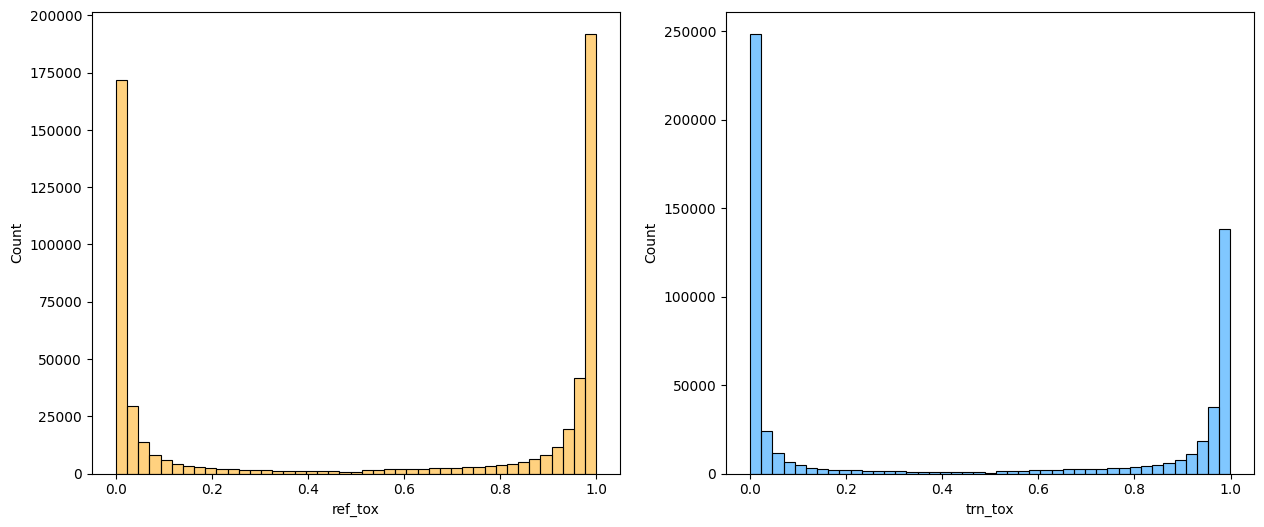

In [39]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
REF_COLOR = 'orange'
TRN_COLOR = tuple(map(lambda x: x / 255, (3,144,255)))
sn.histplot(data, x='ref_tox', alpha=0.5, ax=axs[0], color=REF_COLOR)
sn.histplot(data, x='trn_tox', alpha=0.5, ax=axs[1], color=TRN_COLOR)
plt.show()

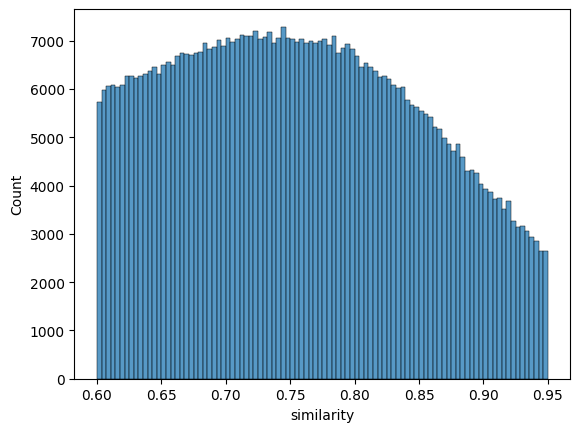

In [56]:
sn.histplot(data, x='similarity')
plt.show()

Simalirity has its mode around 0.75. Labels of toxicity tends to be binary. There is almost none that be 0.5

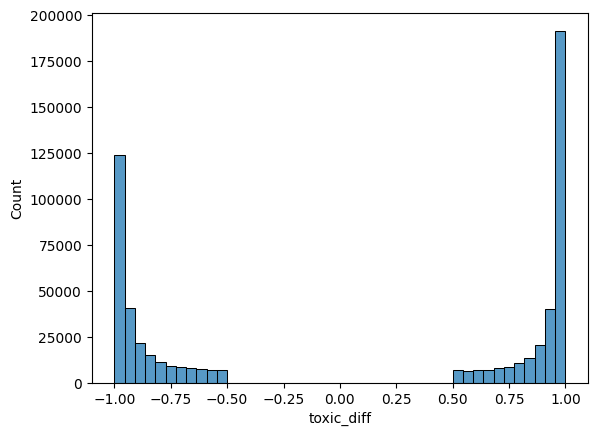

Translation is more toxic: 258635
Reference is more toxic: 319142


In [51]:
data['toxic_diff'] = data['ref_tox'] - data['trn_tox']
sn.histplot(data, x = 'toxic_diff')
plt.show()
print("Translation is more toxic:", (data["toxic_diff"] < 0).sum())
print("Reference is more toxic:", (data["toxic_diff"] >= 0).sum())

We can see that translated text is often more toxic that original.

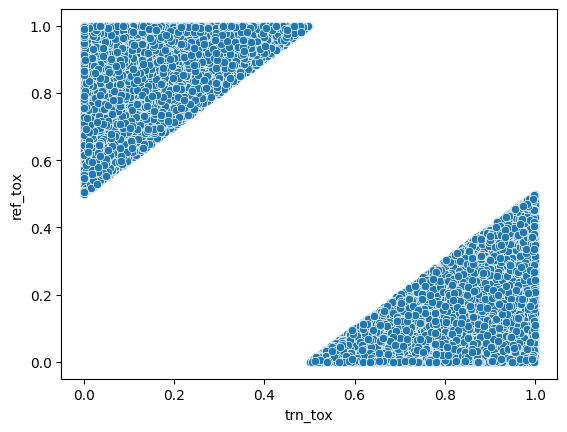

In [52]:
sn.scatterplot(data, x='trn_tox', y='ref_tox')
plt.show()

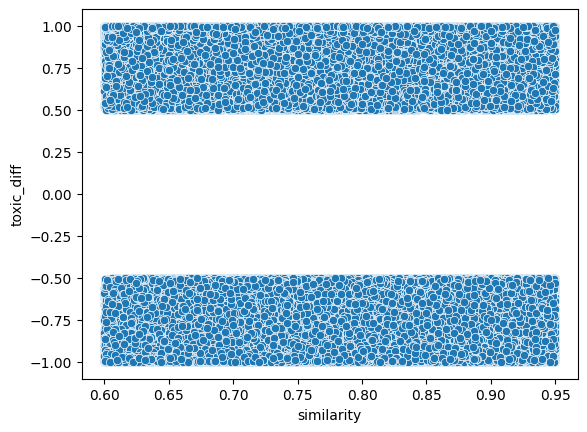

In [53]:
sn.scatterplot(data, x='similarity', y='toxic_diff')
plt.show()

We can see that our data is quite clusterd in two clusters:
- reference text is less toxic
- translated text is less toxic

Similarity has little role in toxic difference

## Conclusion

It is uknown what `length_diff` represents. In addition, we